In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [58]:
df = pd.read_csv('data/bmw_pricing.csv')
df.head()

#df['paint_color'] = df['paint_color'].astype(str)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [59]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
maker_key            4843 non-null object
model_key            4843 non-null object
mileage              4843 non-null int64
engine_power         4843 non-null int64
registration_date    4843 non-null object
fuel                 4843 non-null object
paint_color          4843 non-null object
car_type             4843 non-null object
feature_1            4843 non-null bool
feature_2            4843 non-null bool
feature_3            4843 non-null bool
feature_4            4843 non-null bool
feature_5            4843 non-null bool
feature_6            4843 non-null bool
feature_7            4843 non-null bool
feature_8            4843 non-null bool
price                4843 non-null int64
sold_at              4843 non-null object
dtypes: bool(8), int64(3), object(7)
memory usage: 283.8+ KB


,mileage,engine_power,price
count,4.843000e+03,4843.00000,4843.000000
mean,1.409628e+05,128.98823,15828.081767
std,6.019674e+04,38.99336,9220.285684
min,-6.400000e+01,0.00000,100.000000
25%,1.029135e+05,100.00000,10800.000000
50%,1.410800e+05,120.00000,14200.000000
75%,1.751955e+05,135.00000,18600.000000
max,1.000376e+06,423.00000,178500.000000


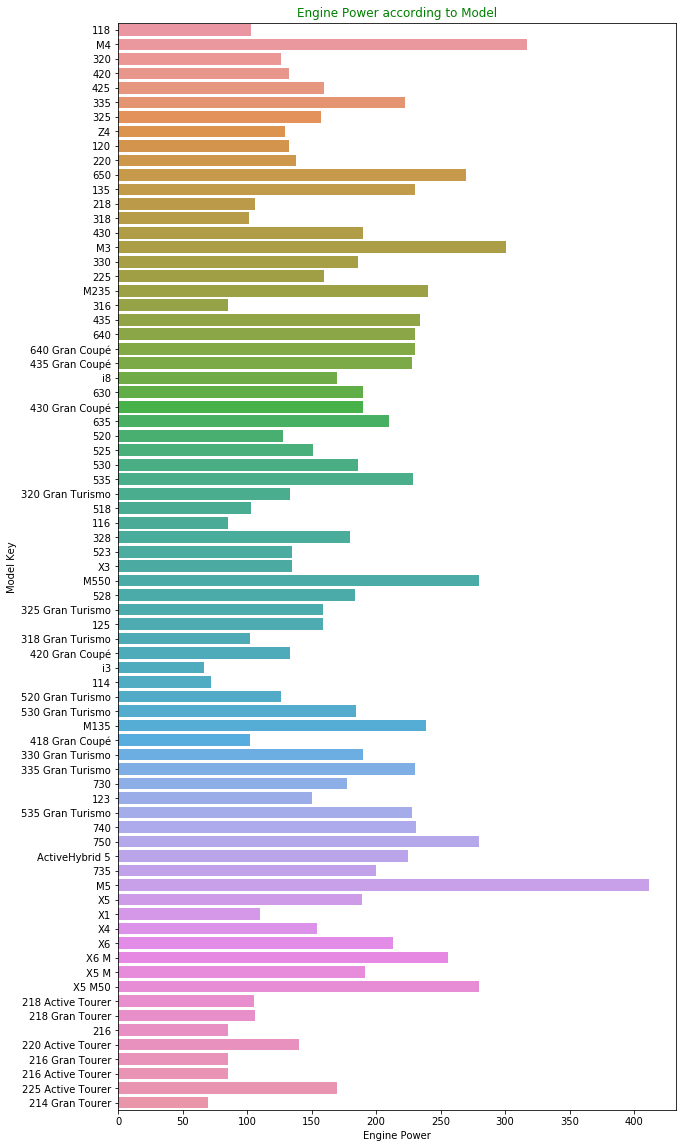

In [60]:
model_key = df['model_key'].unique()
engine_power = []
for each in model_key:
    x = df[df['model_key']==each]
    engine_power.append(sum(x['engine_power']/len(x)))

plt.figure(figsize=(10,20))
sns.barplot(x=engine_power,y=model_key)
plt.xlabel("Engine Power")
plt.ylabel("Model Key")
plt.title("Engine Power according to Model", color="green")
plt.show()

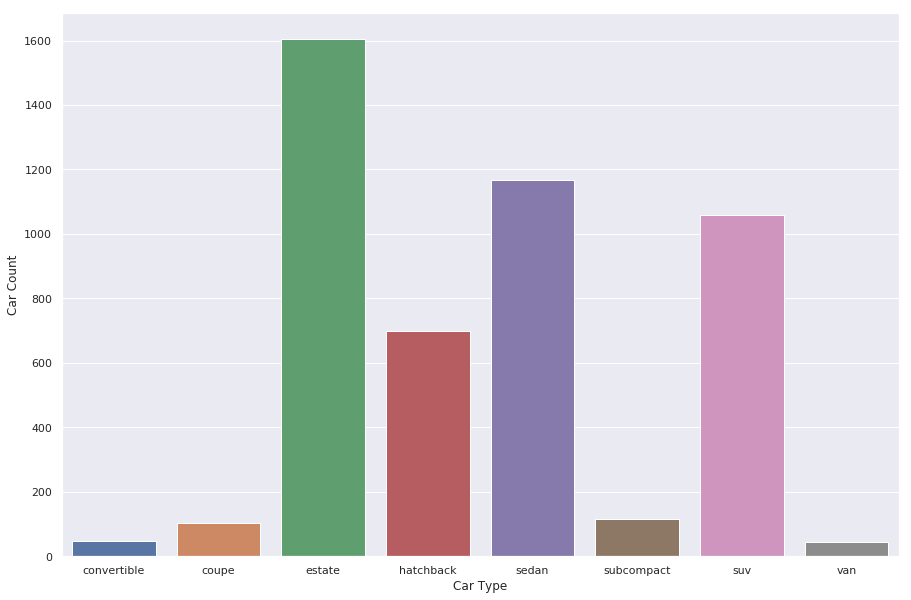

In [67]:
plt.figure(figsize=(15,10))
sns.countplot(df['car_type'])
plt.xlabel("Car Type")
plt.ylabel("Car Count")
plt.show()

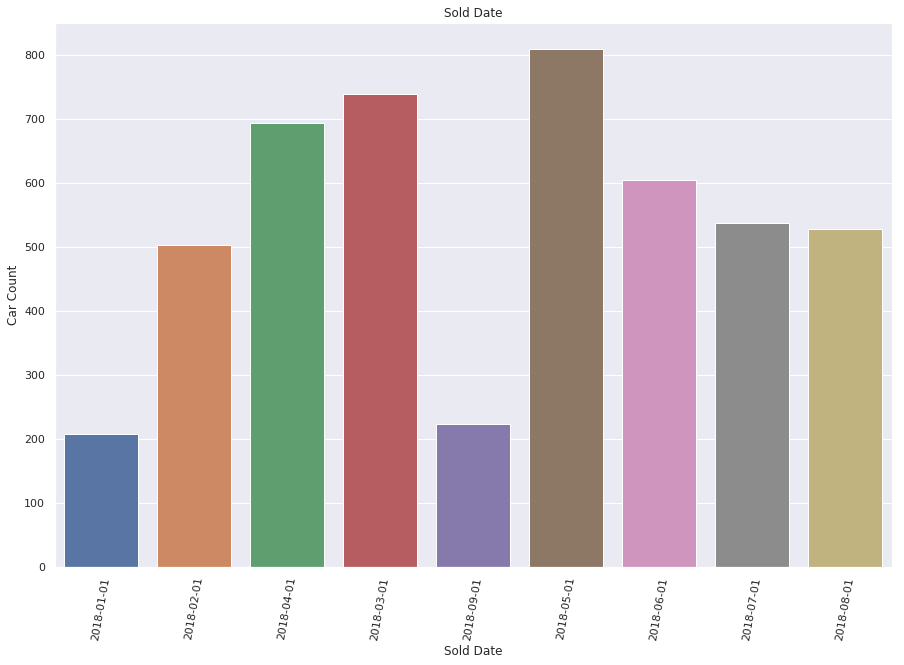

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(df['sold_at'])
plt.xlabel("Sold Date")
plt.ylabel("Car Count")
plt.xticks(rotation=80)
plt.title("Sold Date")
plt.show()

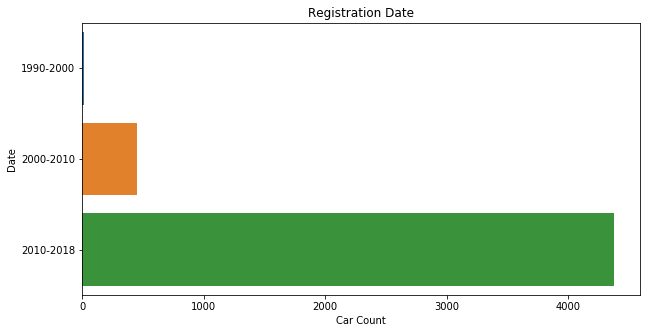

In [61]:
date = []
year = ['1990-2000',"2000-2010","2010-2018"]
for i in range(1,4):
    if (i==1):
        x = df[(df['registration_date']>="1990-03-01") & (df['registration_date']<"2000-01-01")]
        date.append(len(x))
    elif(i==2):
        x = df[(df['registration_date']>="2000-01-01") & (df['registration_date']<"2010-01-01")]
        date.append(len(x))
    elif(i==3):
        x = df[(df['registration_date']>="2010-01-01") & (df['registration_date']<"2018-01-01")]
        date.append(len(x))
plt.figure(figsize=(10,5))
sns.barplot(x=date,y=year)
plt.xlabel("Car Count")
plt.ylabel("Date")
plt.title("Registration Date")
plt.show()

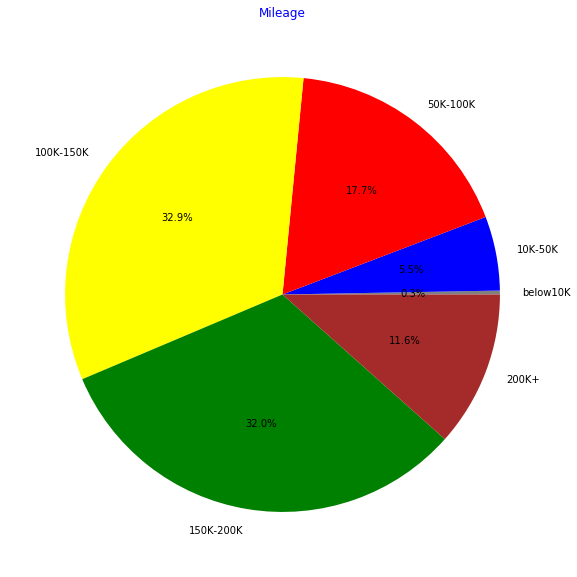

In [62]:
mileage = []
labels = ['below10K','10K-50K','50K-100K','100K-150K','150K-200K','200K+']
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
for each in range(1,21):
    each = each*10000
    if(each==10000):
        x = df[df['mileage']<10000]
        mileage.append(len(x))
    elif(each==50000):
        x = df[(df['mileage']>=10000) & (df['mileage']<50000)]
        mileage.append(len(x))
    elif(each==100000):
        x = df[(df['mileage']>=50000) & (df['mileage']<100000)]
        mileage.append(len(x))
    elif(each==150000):
        x = df[(df['mileage']>=100000) & (df['mileage']<150000)]
        mileage.append(len(x))
    elif(each==200000):
        x = df[(df['mileage']>=150000) & (df['mileage']<200000)]
        mileage.append(len(x))
        x = df[df['mileage']>=200000]
        mileage.append(len(x))
plt.figure(figsize=(10,10))
plt.pie(mileage,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Mileage',color="blue")
plt.show()

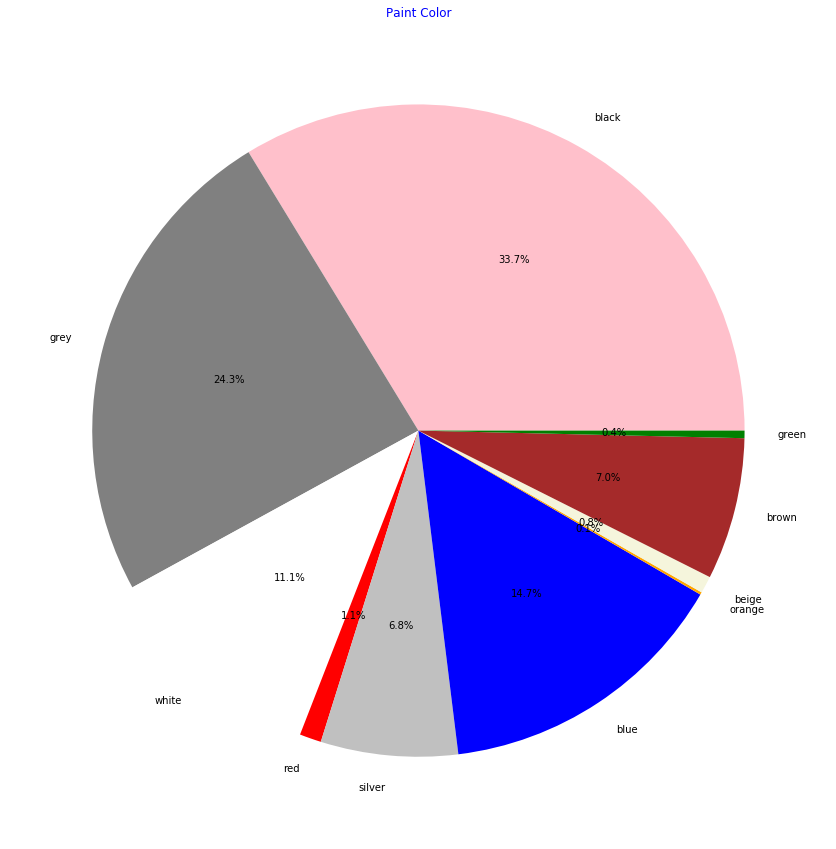

In [63]:
color = []
colors = ['pink','grey','white','red','silver','blue','orange','beige','brown','green']
colors1 = ['black','grey','white','red','silver','blue','orange','beige','brown','green']
explode = [0,0,0,0,0,0,0,0,0,0]
for i in range(1,11):
    if(i==1):
        x = df[df['paint_color']=="black"]
        color.append(len(x))
    elif(i==2):
        x = df[df['paint_color']=="grey"]
        color.append(len(x))
    elif(i==3):
        x = df[df['paint_color']=="white"]
        color.append(len(x))
    elif(i==4):
        x = df[df['paint_color']=="red"]
        color.append(len(x))
    elif(i==5):
        x = df[df['paint_color']=="silver"]
        color.append(len(x))
    elif(i==6):
        x = df[df['paint_color']=="blue"]
        color.append(len(x))
    elif(i==7):
        x = df[df['paint_color']=="orange"]
        color.append(len(x))
    elif(i==8):
        x = df[df['paint_color']=="beige"]
        color.append(len(x))
    elif(i==9):
        x = df[df['paint_color']=="brown"]
        color.append(len(x))
    elif(i==10):
        x = df[df['paint_color']=="green"]
        color.append(len(x))

plt.figure(figsize=(15,15))
plt.pie(color,explode=explode, labels=colors1, colors=colors, autopct='%1.1f%%')
plt.title('Paint Color',color="blue")
plt.show()

diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: fuel, dtype: int64

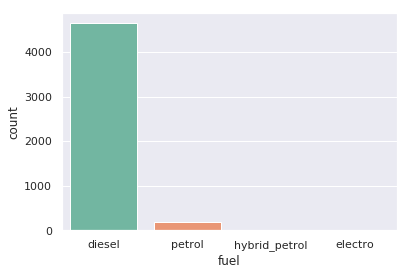

In [64]:
sns.set(style='darkgrid')
sns.countplot(x='fuel',data=df,palette='Set2')
df['fuel'].value_counts()

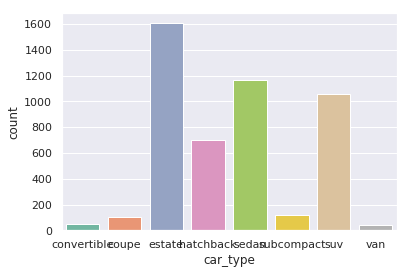

In [65]:
sns.set(style='darkgrid')
sns.countplot(x='car_type',data=df,palette='Set2')

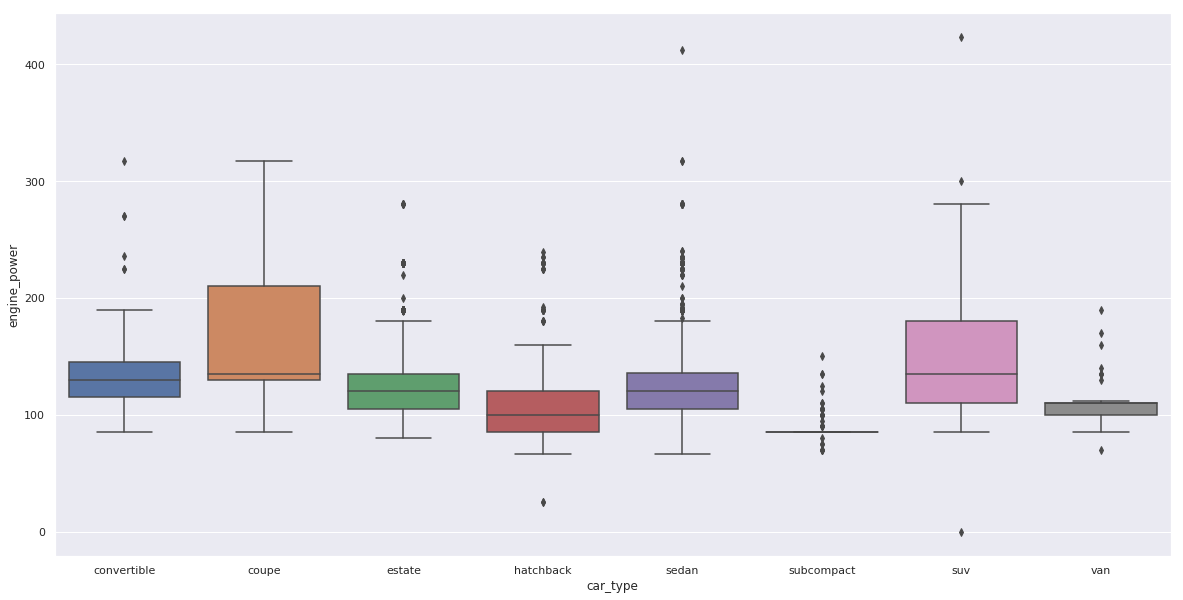

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot('car_type','engine_power',data=df);

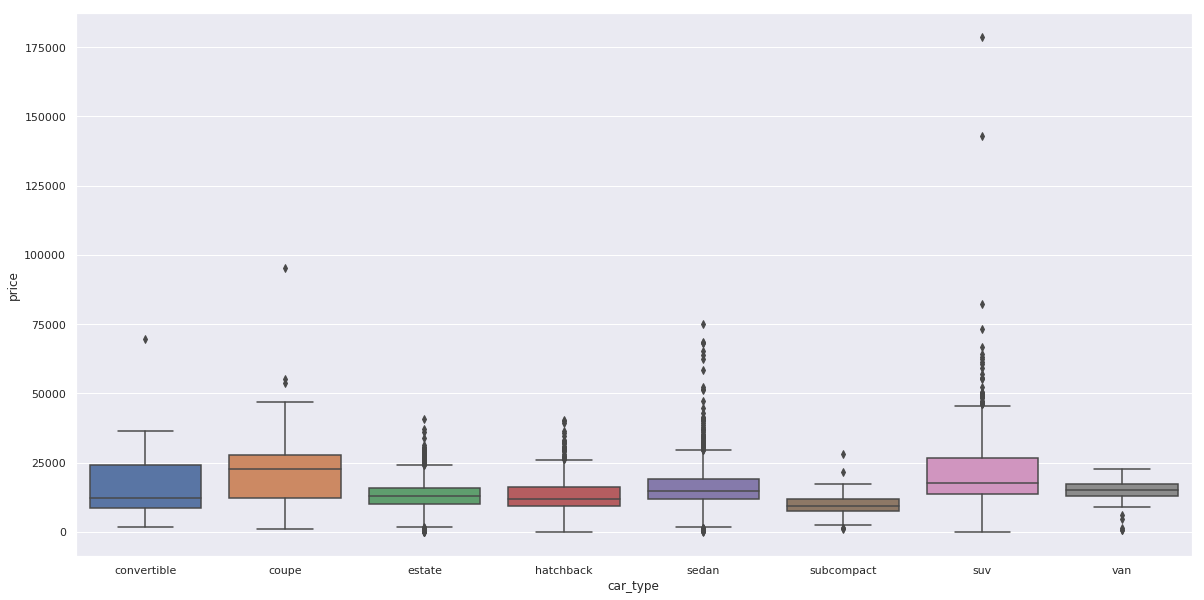

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot('car_type','price',data=df)

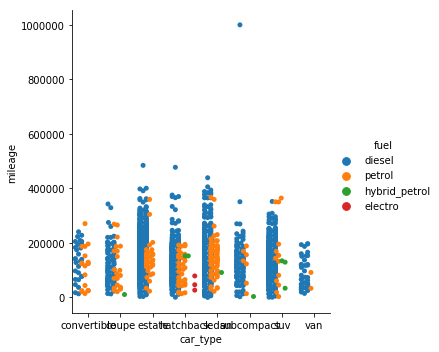

In [3]:
sns.catplot(x='car_type',y='mileage',hue='fuel',data=df,kind='swarm',dodge=True)

In [6]:
df_sold_at = df.groupby(['sold_at']).first()
df_sold_at


,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price
sold_at,,,,,,,,,,,,,,,,,
2018-01-01,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300
2018-02-01,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700
2018-03-01,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,False,False,False,True,True,False,6200
2018-04-01,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400
2018-05-01,BMW,Z4,128940,110,2008-03-01,petrol,black,convertible,True,False,False,False,False,False,True,False,7700
2018-06-01,BMW,218,25050,100,2016-01-01,petrol,grey,convertible,False,True,False,False,False,False,True,True,31000
2018-07-01,BMW,650,24452,270,2008-01-01,petrol,grey,convertible,True,False,False,False,False,False,True,False,6800
2018-08-01,BMW,M3,270907,236,1996-08-01,petrol,black,convertible,True,False,False,False,False,True,True,False,12100
2018-09-01,BMW,650,24521,270,2008-01-01,petrol,grey,convertible,True,False,False,False,False,False,True,False,9200


In [7]:
df_sold_at.count()

maker_key            9
model_key            9
mileage              9
engine_power         9
registration_date    9
fuel                 9
paint_color          9
car_type             9
feature_1            9
feature_2            9
feature_3            9
feature_4            9
feature_5            9
feature_6            9
feature_7            9
feature_8            9
price                9
dtype: int64

In [8]:
df_estate = df[df.car_type=='estate']
df_sedan = df[df.car_type=='sedan']
df_suv = df[df.car_type=='suv']

In [9]:
df_estate.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
151,BMW,320,227832,120,2008-04-01,diesel,black,estate,True,False,False,False,False,False,True,False,5400,2018-01-01
152,BMW,318,108245,100,2013-03-01,diesel,brown,estate,True,True,True,False,False,False,True,False,11700,2018-01-01
153,BMW,520,221018,135,2014-06-01,diesel,black,estate,True,True,False,True,True,False,True,True,16500,2018-01-01
154,BMW,318,101658,100,2013-02-01,diesel,grey,estate,False,True,False,False,False,False,True,False,11400,2018-01-01
155,BMW,320,163181,120,2012-03-01,diesel,grey,estate,False,False,False,False,False,False,True,False,8200,2018-01-01


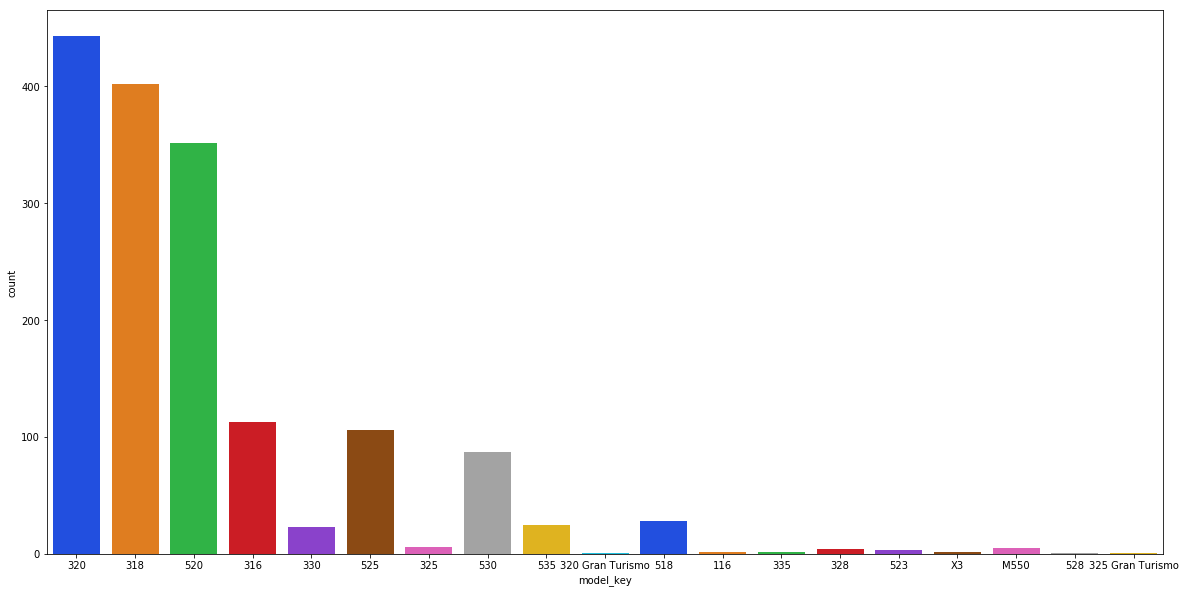

In [10]:
plt.figure(figsize=(20,10))
sns.countplot('model_key',data=df_estate,palette='bright')

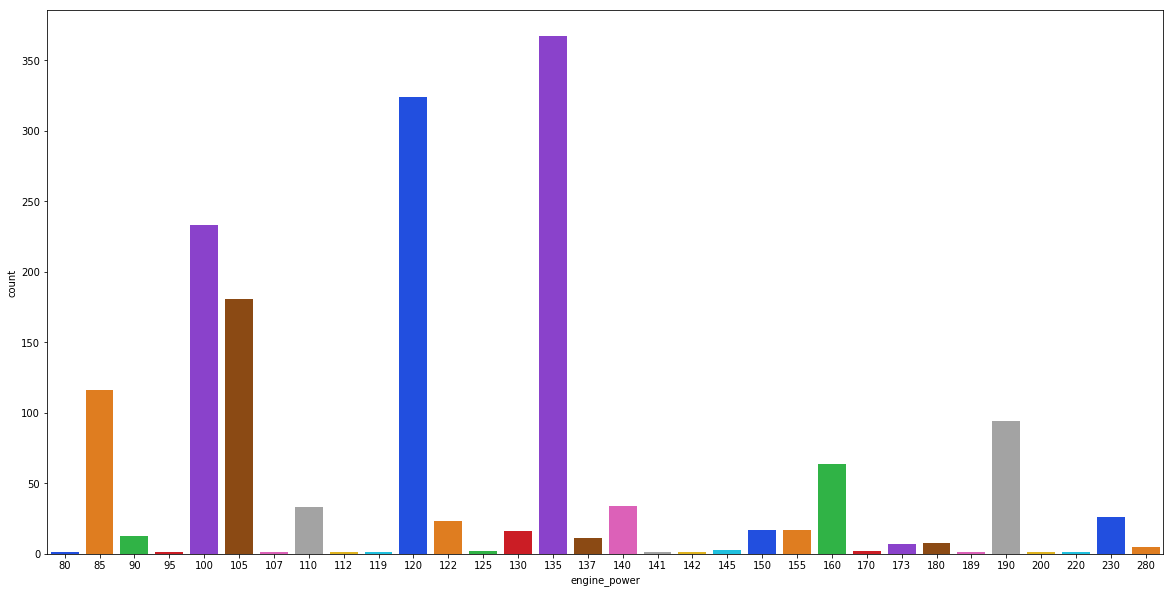

In [11]:
plt.figure(figsize=(20,10))
sns.countplot('engine_power',data=df_estate,palette='bright')

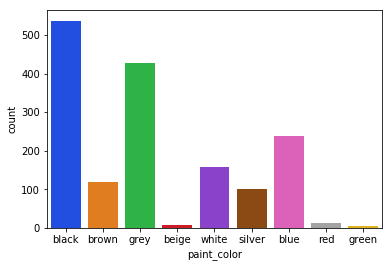

In [12]:
sns.countplot('paint_color',data=df_estate,palette='bright')

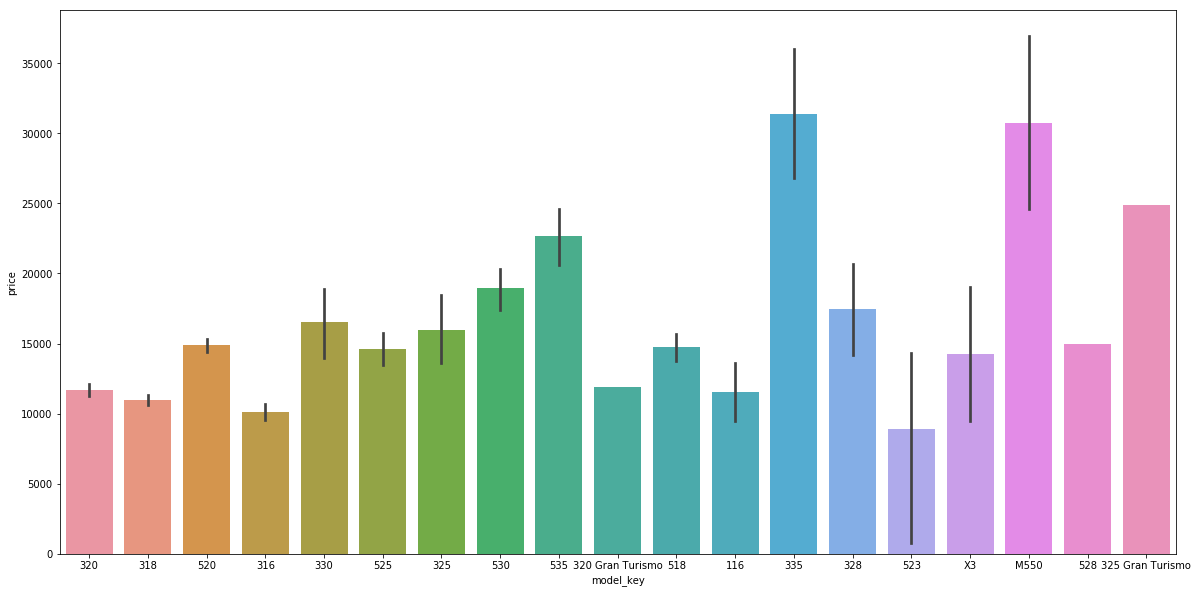

In [13]:
plt.figure(figsize=(20,10))
sns.barplot('model_key','price',data=df_estate)

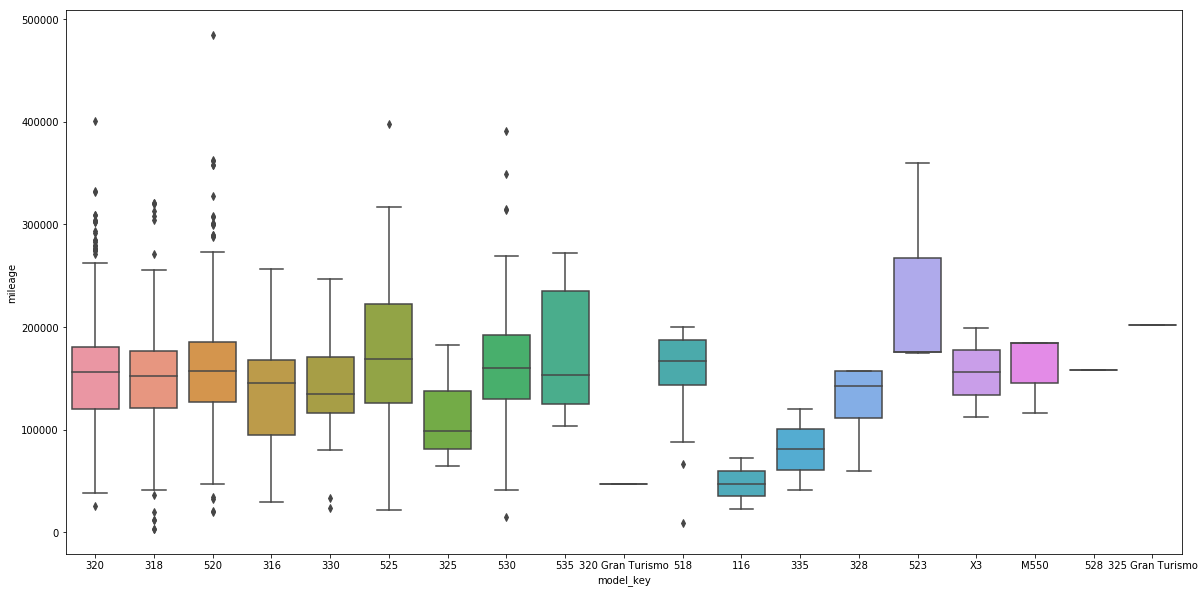

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot('model_key','mileage',data=df_estate)

Text(0, 0.5, 'price of estate')

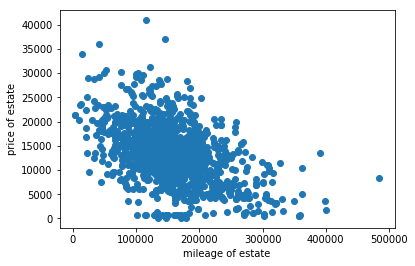

In [15]:
plt.scatter('mileage','price',data=df_estate)
plt.xlabel('mileage of estate')
plt.ylabel('price of estate')

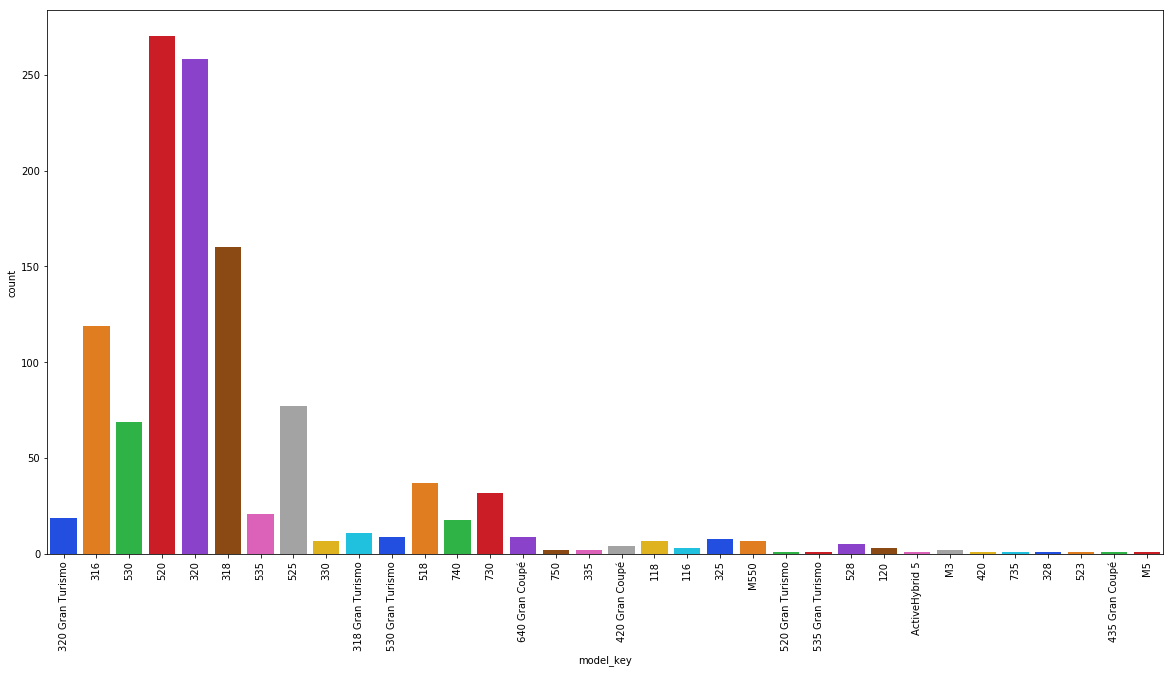

In [19]:
plt.figure(figsize=(20,10))
d = sns.countplot('model_key',data=df_sedan,palette='bright')
_ = plt.setp(d.get_xticklabels(),rotation=90)

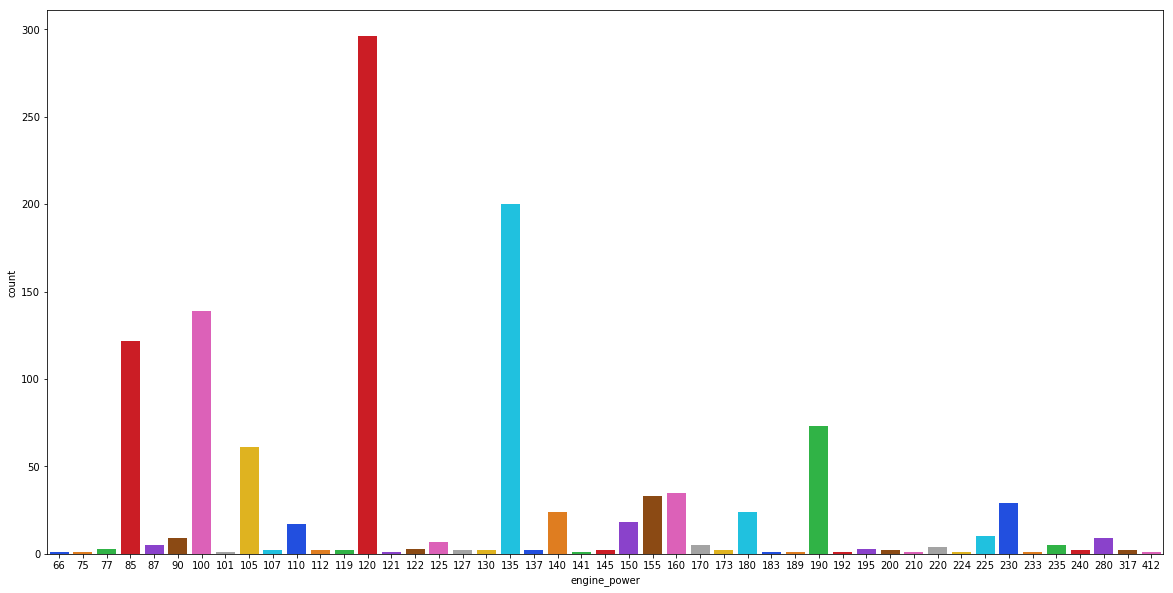

In [20]:
plt.figure(figsize=(20,10))
sns.countplot('engine_power',data=df_sedan,palette='bright')

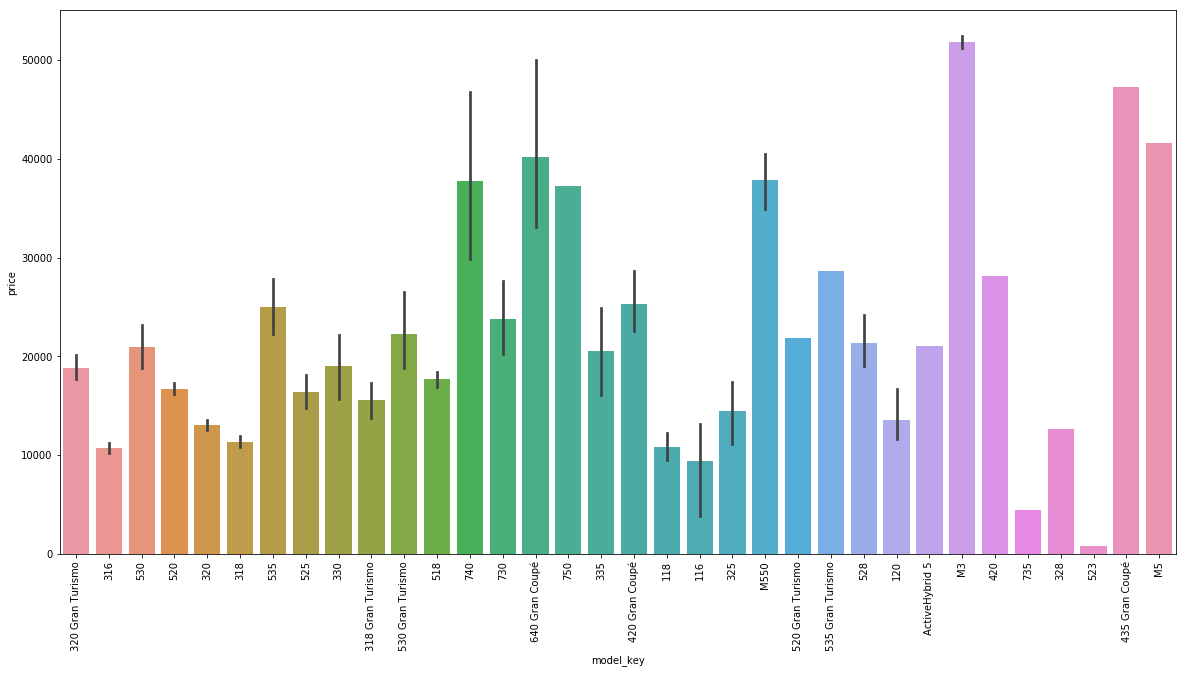

In [21]:
plt.figure(figsize=(20,10))
d = sns.barplot('model_key','price',data=df_sedan)
_ = plt.setp(d.get_xticklabels(),rotation=90)

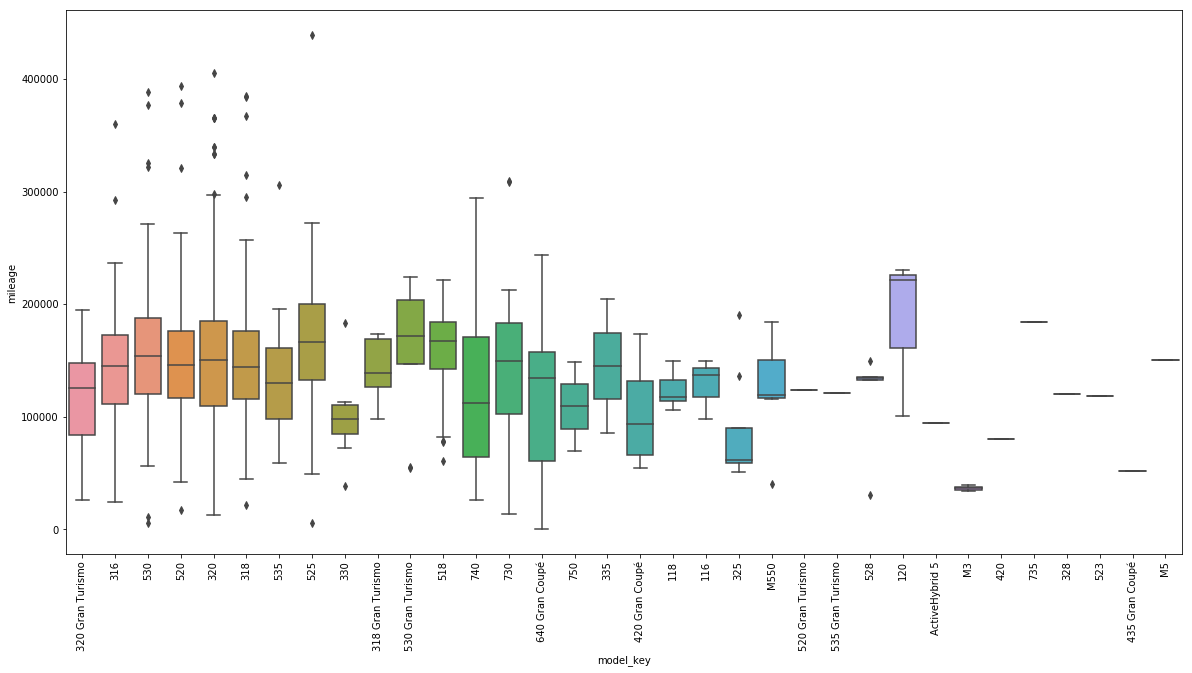

In [22]:
plt.figure(figsize=(20,10))
d = sns.boxplot('model_key','mileage',data=df_sedan)
_ = plt.setp(d.get_xticklabels(),rotation=90)

Text(0, 0.5, 'price of sedan')

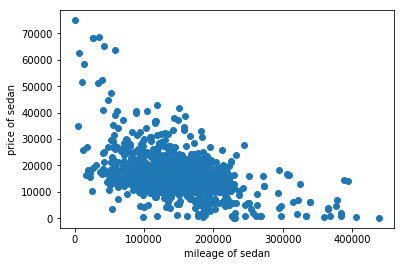

In [23]:
plt.scatter('mileage','price',data=df_sedan)
plt.xlabel('mileage of sedan')
plt.ylabel('price of sedan')

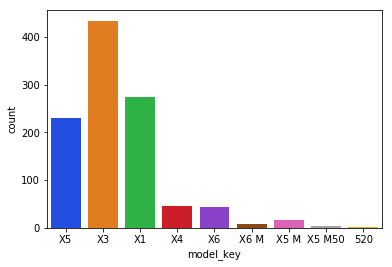

In [24]:
d = sns.countplot('model_key',data=df_suv,palette='bright')

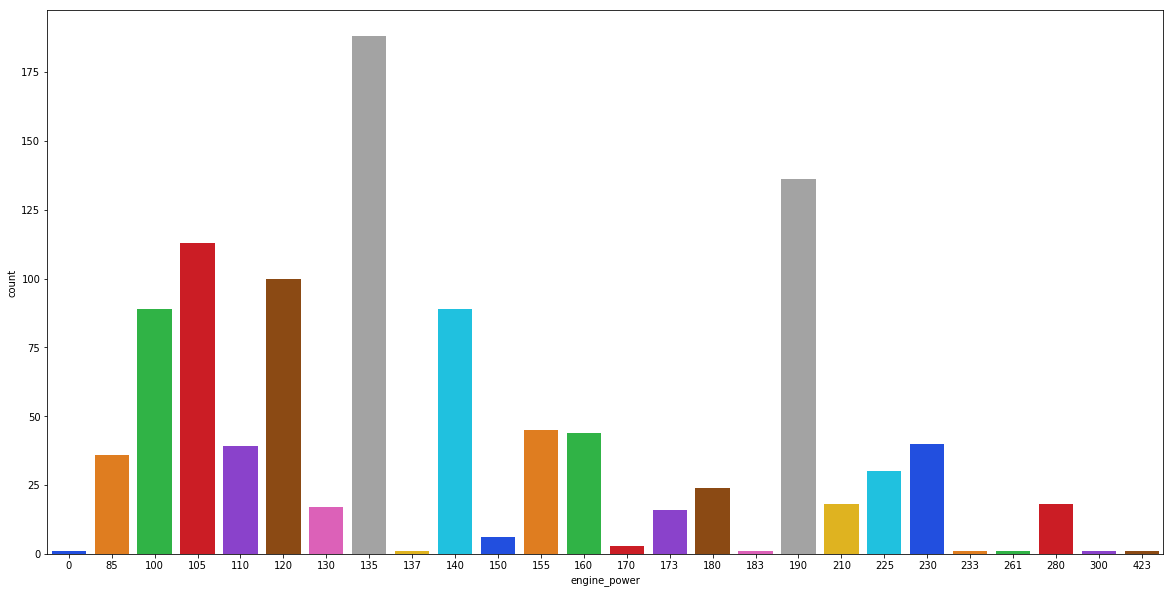

In [25]:
plt.figure(figsize=(20,10))
sns.countplot('engine_power',data=df_suv,palette='bright')

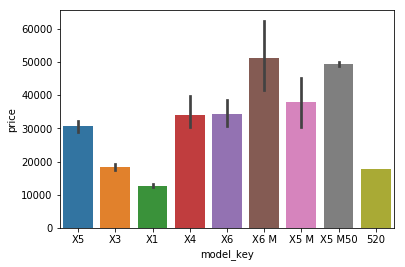

In [26]:
d = sns.barplot('model_key','price',data=df_suv)

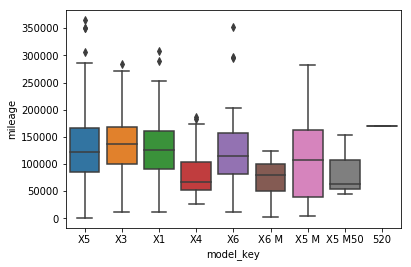

In [27]:
d = sns.boxplot('model_key','mileage',data=df_suv)

Text(0, 0.5, 'price of suv')

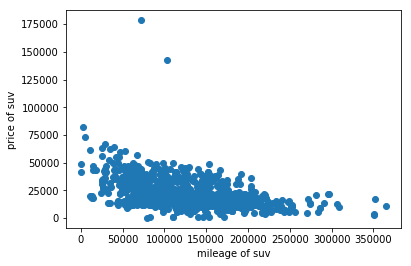

In [28]:
plt.scatter('mileage','price',data=df_suv)
plt.xlabel('mileage of suv')
plt.ylabel('price of suv')

In [29]:
df['car_type'] =df.car_type.map(lambda x:1.0 if x =='convertible' else x)
df['car_type'] =df.car_type.map(lambda x:2.0 if x =='coupe' else x)
df['car_type'] =df.car_type.map(lambda x:3.0 if x =='estate' else x)
df['car_type'] =df.car_type.map(lambda x:4.0 if x =='hatchback' else x)
df['car_type'] =df.car_type.map(lambda x:5.0 if x =='sedan' else x)
df['car_type'] =df.car_type.map(lambda x:6.0 if x =='suv' else x)
df['car_type'] =df.car_type.map(lambda x:7.0 if x =='van' else x)
df['car_type'] =df.car_type.map(lambda x:8.0 if x =='subcompact' else x)
df['car_type'] = df['car_type'].astype(int)

In [30]:
df['feature_1'] =df.feature_1.map(lambda x:1 if x ==True else 0)
df['feature_2'] =df.feature_2.map(lambda x:1 if x ==True else 0)
df['feature_3'] =df.feature_3.map(lambda x:1 if x ==True else 0)
df['feature_4'] =df.feature_4.map(lambda x:1 if x ==True else 0)
df['feature_5'] =df.feature_5.map(lambda x:1 if x ==True else 0)
df['feature_6'] =df.feature_6.map(lambda x:1 if x ==True else 0)
df['feature_7'] =df.feature_7.map(lambda x:1 if x ==True else 0)
df['feature_8'] =df.feature_8.map(lambda x:1 if x ==True else 0)
df.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,1,1,1,0,0,1,1,1,0,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,1,1,1,0,0,0,1,1,1,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,1,0,0,0,0,1,0,1,0,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,1,1,1,0,0,1,1,1,1,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,1,1,1,0,0,0,1,1,1,33400,2018-04-01


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
maker_key            4843 non-null object
model_key            4843 non-null object
mileage              4843 non-null int64
engine_power         4843 non-null int64
registration_date    4843 non-null object
fuel                 4843 non-null object
paint_color          4843 non-null object
car_type             4843 non-null int32
feature_1            4843 non-null int64
feature_2            4843 non-null int64
feature_3            4843 non-null int64
feature_4            4843 non-null int64
feature_5            4843 non-null int64
feature_6            4843 non-null int64
feature_7            4843 non-null int64
feature_8            4843 non-null int64
price                4843 non-null int64
sold_at              4843 non-null object
dtypes: int32(1), int64(11), object(6)
memory usage: 548.7+ KB


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
from sklearn import metrics

In [33]:
x = df[['mileage','engine_power','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','car_type']]
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=36)

In [34]:
lr =LinearRegression()
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)
print('real value y_test[1]:'+str(y_test[1])+'  predict:'+str(lr.predict(x_test.iloc[[1],:])))
print('scort:',lr.score(x_test,y_test))
print('r2 score:',r2_score(y_test,predict_lr))

real value y_test[1]:69700  predict:[14580.12809033]
scort: 0.7008943553806172
r2 score: 0.7008943553806172


In [35]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
predict_rfr = rfr.predict(x_test)
print('real value y_test[1]:'+str(y_test[1])+'  predict:'+str(rfr.predict(x_test.iloc[[1],:])))
print('scort:',rfr.score(x_test,y_test))
print('r2 score:',r2_score(y_test,predict_rfr))

/home/fjvarasc/DSPXI/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


real value y_test[1]:69700  predict:[15600.]
scort: 0.7435225709337604
r2 score: 0.7435225709337604


In [36]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predict_dtr = dtr.predict(x_test)
print('real value y_test[1]:'+str(y_test[1])+'  predict:'+str(dtr.predict(x_test.iloc[[1],:])))
print('scort:',dtr.score(x_test,y_test))
print('r2 score:',r2_score(y_test,predict_dtr))

real value y_test[1]:69700  predict:[17300.]
scort: 0.6832559494150072
r2 score: 0.6832559494150072


Text(0, 0.5, 'r2 score')

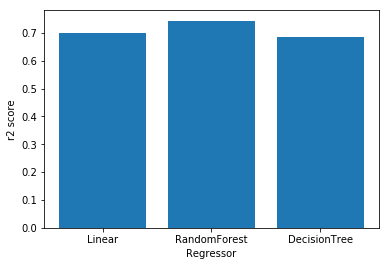

In [37]:
y = np.array([r2_score(y_test,predict_lr),r2_score(y_test,predict_rfr),r2_score(y_test,predict_dtr)])
x = ['Linear','RandomForest','DecisionTree']
plt.bar(x,y)
plt.xlabel('Regressor')
plt.ylabel('r2 score')